#### MAIN THINGS TO DO

- Clean the data (remove unnamed columns)
- Currently working with 2015-16 data
- Current plan: 1 model for each season
- Split the data into training and testing
- Create and train model (linear regression)
- Test

#### OTHER IMPORTANT STUFF

- Upload code to GitHub


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error

In [34]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import abline_plot

In [4]:
import re

In [5]:
# How to filter

#filter1 = (raw_data['Entity'] == "United States")
#data = raw_data[filter1]
#data

In [6]:
# load the data

nikola_15_original = pd.read_csv("./data/data_nikola_2015-16.csv")
nikola_16_original = pd.read_csv("./data/data_nikola_2016-17.csv")

In [7]:
nikola_15_original.head()

,Rk,G,Date,Age,Tm,Unnamed: 5,Opp,Unnamed: 7,GS,MP,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,1,1.0,2015-10-28,20-251,DEN,@,HOU,W (+20),0,3:55,...,0,0,0,0,0,1,0,2,0.7,+1
1,2,2.0,2015-10-30,20-253,DEN,NaN,MIN,L (-17),0,18:09,...,6,9,1,0,0,2,3,10,7.8,+10
2,3,3.0,2015-11-01,20-255,DEN,@,OKC,L (-24),0,24:26,...,1,4,0,0,0,1,2,8,3.9,-2
3,4,NaN,2015-11-03,20-257,DEN,@,LAL,W (+11),Did Not Dress,Did Not Dress,...,Did Not Dress,Did Not Dress,Did Not Dress,Did Not Dress,Did Not Dress,Did Not Dress,Did Not Dress,Did Not Dress,Did Not Dress,Did Not Dress
4,5,4.0,2015-11-05,20-259,DEN,NaN,UTA,L (-12),0,17:44,...,2,3,0,0,1,1,1,5,2.8,-6


In [8]:
nikola_16_original.head()

,Rk,G,Date,Age,Tm,Unnamed: 5,Opp,Unnamed: 7,GS,MP,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,1,1.0,2016-10-26,21-250,DEN,@,NOP,W (+5),1,21:08,...,6,7,2,0,0,4,4,5,0.6,+5
1,2,2.0,2016-10-29,21-253,DEN,NaN,POR,L (-2),1,34:06,...,11,17,2,4,1,1,5,23,23.2,-1
2,3,3.0,2016-10-31,21-255,DEN,@,TOR,L (-3),1,22:22,...,2,4,1,0,0,4,4,12,5.2,-9
3,4,4.0,2016-11-03,21-258,DEN,@,MIN,W (+3),1,14:26,...,2,3,5,0,0,1,3,8,8.9,+7
4,5,5.0,2016-11-05,21-260,DEN,@,DET,L (-17),1,22:42,...,4,6,0,1,1,1,3,6,3.0,-14


In [9]:
nikola_15_original.columns

Index(['Rk', 'G', 'Date', 'Age', 'Tm', 'Unnamed: 5', 'Opp', 'Unnamed: 7', 'GS',
       'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'GmSc', '+/-'],
      dtype='object')

In [10]:
nikola_15_original.rename(columns = {'Unnamed: 5' : 'Loc'}, inplace = True)

# nikola_15 = nikola_15_original.drop(labels = ['Unnamed: 7'], axis = 1)
nikola_15 = nikola_15_original.dropna(subset=['G'], inplace = False)

nikola_15

,Rk,G,Date,Age,Tm,Loc,Opp,Unnamed: 7,GS,MP,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,1,1.0,2015-10-28,20-251,DEN,@,HOU,W (+20),0,3:55,...,0,0,0,0,0,1,0,2,0.7,+1
1,2,2.0,2015-10-30,20-253,DEN,NaN,MIN,L (-17),0,18:09,...,6,9,1,0,0,2,3,10,7.8,+10
2,3,3.0,2015-11-01,20-255,DEN,@,OKC,L (-24),0,24:26,...,1,4,0,0,0,1,2,8,3.9,-2
4,5,4.0,2015-11-05,20-259,DEN,NaN,UTA,L (-12),0,17:44,...,2,3,0,0,1,1,1,5,2.8,-6
5,6,5.0,2015-11-06,20-260,DEN,@,GSW,L (-15),0,17:00,...,2,4,1,1,1,1,1,4,4.2,-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,78,76.0,2016-04-02,21-043,DEN,NaN,SAC,L (-9),1,32:14,...,9,13,5,1,2,0,2,6,13.2,-1
78,79,77.0,2016-04-05,21-046,DEN,NaN,OKC,L (-22),1,19:03,...,2,2,2,0,2,0,2,7,7.3,-9
79,80,78.0,2016-04-08,21-049,DEN,NaN,SAS,W (+4),1,32:13,...,12,15,4,1,1,0,2,8,12.3,+24
80,81,79.0,2016-04-10,21-051,DEN,NaN,UTA,L (-16),1,36:02,...,8,11,4,2,1,1,4,19,22.5,-16


In [11]:
# changes location to 'home'/'away'

nikola_15['Loc'] = nikola_15['Loc'].astype('str')

def loc_change(x):
    if x == '@':
        return 'Away'
    elif x == "nan":
        return 'Home'

nikola_15['Loc'] = nikola_15['Loc'].apply(loc_change)

C:\Users\epicd\AppData\Local\Temp\ipykernel_2900\3607296660.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nikola_15['Loc'] = nikola_15['Loc'].astype('str')
C:\Users\epicd\AppData\Local\Temp\ipykernel_2900\3607296660.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nikola_15['Loc'] = nikola_15['Loc'].apply(loc_change)


In [12]:
def extract_WL(x):

    return x[0]


nikola_15['Unnamed: 7'].astype('str')

nikola_15['W/L'] = nikola_15['Unnamed: 7'].apply(extract_WL)

nikola_15

C:\Users\epicd\AppData\Local\Temp\ipykernel_2900\2850094076.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nikola_15['W/L'] = nikola_15['Unnamed: 7'].apply(extract_WL)


,Rk,G,Date,Age,Tm,Loc,Opp,Unnamed: 7,GS,MP,...,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-,W/L
0,1,1.0,2015-10-28,20-251,DEN,Away,HOU,W (+20),0,3:55,...,0,0,0,0,1,0,2,0.7,+1,W
1,2,2.0,2015-10-30,20-253,DEN,Home,MIN,L (-17),0,18:09,...,9,1,0,0,2,3,10,7.8,+10,L
2,3,3.0,2015-11-01,20-255,DEN,Away,OKC,L (-24),0,24:26,...,4,0,0,0,1,2,8,3.9,-2,L
4,5,4.0,2015-11-05,20-259,DEN,Home,UTA,L (-12),0,17:44,...,3,0,0,1,1,1,5,2.8,-6,L
5,6,5.0,2015-11-06,20-260,DEN,Away,GSW,L (-15),0,17:00,...,4,1,1,1,1,1,4,4.2,-5,L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,78,76.0,2016-04-02,21-043,DEN,Home,SAC,L (-9),1,32:14,...,13,5,1,2,0,2,6,13.2,-1,L
78,79,77.0,2016-04-05,21-046,DEN,Home,OKC,L (-22),1,19:03,...,2,2,0,2,0,2,7,7.3,-9,L
79,80,78.0,2016-04-08,21-049,DEN,Home,SAS,W (+4),1,32:13,...,15,4,1,1,0,2,8,12.3,+24,W
80,81,79.0,2016-04-10,21-051,DEN,Home,UTA,L (-16),1,36:02,...,11,4,2,1,1,4,19,22.5,-16,L


In [13]:
# Diff column

def diff(points):
    sign = points[3]
    pattern = r'\d+'
    numbers = re.findall(pattern, points)
    digit = numbers[0]
    return sign + digit

nikola_15['diff'] = nikola_15['Unnamed: 7'].apply(diff)

nikola_15.head()



C:\Users\epicd\AppData\Local\Temp\ipykernel_2900\1782817254.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nikola_15['diff'] = nikola_15['Unnamed: 7'].apply(diff)


,Rk,G,Date,Age,Tm,Loc,Opp,Unnamed: 7,GS,MP,...,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-,W/L,diff
0,1,1.0,2015-10-28,20-251,DEN,Away,HOU,W (+20),0,3:55,...,0,0,0,1,0,2,0.7,+1,W,+20
1,2,2.0,2015-10-30,20-253,DEN,Home,MIN,L (-17),0,18:09,...,1,0,0,2,3,10,7.8,+10,L,-17
2,3,3.0,2015-11-01,20-255,DEN,Away,OKC,L (-24),0,24:26,...,0,0,0,1,2,8,3.9,-2,L,-24
4,5,4.0,2015-11-05,20-259,DEN,Home,UTA,L (-12),0,17:44,...,0,0,1,1,1,5,2.8,-6,L,-12
5,6,5.0,2015-11-06,20-260,DEN,Away,GSW,L (-15),0,17:00,...,1,1,1,1,1,4,4.2,-5,L,-15


In [14]:
nikola_15.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80 entries, 0 to 81
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rk          80 non-null     int64  
 1   G           80 non-null     float64
 2   Date        80 non-null     object 
 3   Age         80 non-null     object 
 4   Tm          80 non-null     object 
 5   Loc         80 non-null     object 
 6   Opp         80 non-null     object 
 7   Unnamed: 7  80 non-null     object 
 8   GS          80 non-null     object 
 9   MP          80 non-null     object 
 10  FG          80 non-null     object 
 11  FGA         80 non-null     object 
 12  FG%         76 non-null     object 
 13  3P          80 non-null     object 
 14  3PA         80 non-null     object 
 15  3P%         53 non-null     object 
 16  FT          80 non-null     object 
 17  FTA         80 non-null     object 
 18  FT%         53 non-null     object 
 19  ORB         80 non-null     object 


In [15]:
# number of null values per column
nikola_15.isnull().sum()


Rk             0
G              0
Date           0
Age            0
Tm             0
Loc            0
Opp            0
Unnamed: 7     0
GS             0
MP             0
FG             0
FGA            0
FG%            4
3P             0
3PA            0
3P%           27
FT             0
FTA            0
FT%           27
ORB            0
DRB            0
TRB            0
AST            0
STL            0
BLK            0
TOV            0
PF             0
PTS            0
GmSc           0
+/-            0
W/L            0
diff           0
dtype: int64

In [16]:
# New dataframe w/o Tm, FG%, 3P%, and FT% --> we had null values so we removed those

nikola_15_data = nikola_15.drop(labels=['Rk', 'Date', 'G', 'Tm', 'FG%', '3P%', 'FT%'], axis=1)
nikola_15_data.columns

Index(['Age', 'Loc', 'Opp', 'Unnamed: 7', 'GS', 'MP', 'FG', 'FGA', '3P', '3PA',
       'FT', 'FTA', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS', 'GmSc', '+/-', 'W/L', 'diff'],
      dtype='object')

**FIXING DATA TYPES**

In [17]:
# we need to change the datatypes here

nikola_15_data.dtypes

Age           object
Loc           object
Opp           object
Unnamed: 7    object
GS            object
MP            object
FG            object
FGA           object
3P            object
3PA           object
FT            object
FTA           object
ORB           object
DRB           object
TRB           object
AST           object
STL           object
BLK           object
TOV           object
PF            object
PTS           object
GmSc          object
+/-           object
W/L           object
diff          object
dtype: object

In [18]:
def convert_mp(mp_time): # WORKS!

    vals = mp_time.split(':')

    seconds = float(vals[1])

    seconds_in_minutes = seconds / 60.0

    return round(float(vals[0]) + seconds_in_minutes, 2)

def convert_age(age): # WORKS!

    vals = age.split('-')

    years = int(vals[0])

    return years


In [19]:
# run this once only

# datetime

# nikola_15_data['Date'] = pd.to_datetime(nikola_15_data['Date'])


# columns to change to int values

cols = ['FG', 'FGA', '3P', '3PA', 'FT', 'FTA', 'ORB', 'DRB', 'TRB', 
        'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', '+/-']

nikola_15_data[cols] = nikola_15_data[cols].astype(int)


# columns to change to float values

nikola_15_data['GmSc'] = nikola_15_data['GmSc'].astype(float)


# apply both functions -- changing MP and Age to floats/ints

nikola_15_data['MP'] = nikola_15_data['MP'].apply(convert_mp)
nikola_15_data['Age'] = nikola_15_data['Age'].apply(convert_age)

# columns to change to factors

cols_factor = ['Loc', 'Opp', 'GS']

nikola_15_data[cols_factor] = nikola_15_data[cols_factor].astype('category')

In [20]:
nikola_15_data

,Age,Loc,Opp,Unnamed: 7,GS,MP,FG,FGA,3P,3PA,...,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-,W/L,diff
0,20,Away,HOU,W (+20),0,3.92,1,1,0,0,...,0,0,0,1,0,2,0.7,1,W,+20
1,20,Home,MIN,L (-17),0,18.15,5,8,0,0,...,1,0,0,2,3,10,7.8,10,L,-17
2,20,Away,OKC,L (-24),0,24.43,4,9,0,0,...,0,0,0,1,2,8,3.9,-2,L,-24
4,20,Home,UTA,L (-12),0,17.73,1,4,0,0,...,0,0,1,1,1,5,2.8,-6,L,-12
5,20,Away,GSW,L (-15),0,17.00,2,4,0,0,...,1,1,1,1,1,4,4.2,-5,L,-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,21,Home,SAC,L (-9),1,32.23,2,6,0,1,...,5,1,2,0,2,6,13.2,-1,L,-9
78,21,Home,OKC,L (-22),1,19.05,3,5,1,3,...,2,0,2,0,2,7,7.3,-9,L,-22
79,21,Home,SAS,W (+4),1,32.22,3,9,0,2,...,4,1,1,0,2,8,12.3,24,W,+4
80,21,Home,UTA,L (-16),1,36.03,7,9,0,2,...,4,2,1,1,4,19,22.5,-16,L,-16


In [21]:
nikola_15_data.head()

,Age,Loc,Opp,Unnamed: 7,GS,MP,FG,FGA,3P,3PA,...,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-,W/L,diff
0,20,Away,HOU,W (+20),0,3.92,1,1,0,0,...,0,0,0,1,0,2,0.7,1,W,+20
1,20,Home,MIN,L (-17),0,18.15,5,8,0,0,...,1,0,0,2,3,10,7.8,10,L,-17
2,20,Away,OKC,L (-24),0,24.43,4,9,0,0,...,0,0,0,1,2,8,3.9,-2,L,-24
4,20,Home,UTA,L (-12),0,17.73,1,4,0,0,...,0,0,1,1,1,5,2.8,-6,L,-12
5,20,Away,GSW,L (-15),0,17.00,2,4,0,0,...,1,1,1,1,1,4,4.2,-5,L,-15


In [22]:
# check datatypes

nikola_15_data.dtypes

Age              int64
Loc           category
Opp           category
Unnamed: 7      object
GS            category
MP             float64
FG               int64
FGA              int64
3P               int64
3PA              int64
FT               int64
FTA              int64
ORB              int64
DRB              int64
TRB              int64
AST              int64
STL              int64
BLK              int64
TOV              int64
PF               int64
PTS              int64
GmSc           float64
+/-              int64
W/L             object
diff            object
dtype: object

# Modeling

In [23]:
numerical_features = ['FG', 'FGA', '3P', '3PA', 'FT', 'FTA', 'ORB', 'DRB', 'TRB', 
        'AST', 'STL', 'BLK', 'TOV', 'PF', '+/-', 'GmSc', 'MP', 'Age']

categorical_features = ['Loc', 'Opp', 'GS']

In [129]:
#nikola_15_dummy = pd.get_dummies(nikola_15['Loc'], prefix = 'Loc')

nikola_15_dummy = pd.get_dummies(nikola_15_data, columns=categorical_features, dtype = 'int')

nikola_15_dummy

,Age,Unnamed: 7,MP,FG,FGA,3P,3PA,FT,FTA,ORB,...,Opp_PHI,Opp_PHO,Opp_POR,Opp_SAC,Opp_SAS,Opp_TOR,Opp_UTA,Opp_WAS,GS_0,GS_1
0,20,W (+20),3.92,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,20,L (-17),18.15,5,8,0,0,0,0,3,...,0,0,0,0,0,0,0,0,1,0
2,20,L (-24),24.43,4,9,0,0,0,0,3,...,0,0,0,0,0,0,0,0,1,0
4,20,L (-12),17.73,1,4,0,0,3,4,1,...,0,0,0,0,0,0,1,0,1,0
5,20,L (-15),17.00,2,4,0,0,0,2,2,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,21,L (-9),32.23,2,6,0,1,2,2,4,...,0,0,0,1,0,0,0,0,0,1
78,21,L (-22),19.05,3,5,1,3,0,0,0,...,0,0,0,0,0,0,0,0,0,1
79,21,W (+4),32.22,3,9,0,2,2,2,3,...,0,0,0,0,1,0,0,0,0,1
80,21,L (-16),36.03,7,9,0,2,5,6,3,...,0,0,0,0,0,0,1,0,0,1


In [29]:
nikola_15_dummy.columns

Index(['Age', 'Unnamed: 7', 'MP', 'FG', 'FGA', '3P', '3PA', 'FT', 'FTA', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'GmSc', '+/-',
       'W/L', 'diff', 'Loc_Away', 'Loc_Home', 'Opp_ATL', 'Opp_BOS', 'Opp_BRK',
       'Opp_CHI', 'Opp_CHO', 'Opp_CLE', 'Opp_DAL', 'Opp_DET', 'Opp_GSW',
       'Opp_HOU', 'Opp_IND', 'Opp_LAC', 'Opp_LAL', 'Opp_MEM', 'Opp_MIA',
       'Opp_MIL', 'Opp_MIN', 'Opp_NOP', 'Opp_NYK', 'Opp_OKC', 'Opp_ORL',
       'Opp_PHI', 'Opp_PHO', 'Opp_POR', 'Opp_SAC', 'Opp_SAS', 'Opp_TOR',
       'Opp_UTA', 'Opp_WAS', 'GS_0', 'GS_1'],
      dtype='object')

In [130]:
nikola_15_dummy_lin_reg = nikola_15_dummy.drop(labels = ['Unnamed: 7', 'W/L', 'diff'], axis= 1)

In [31]:
nikola_15_dummy_lin_reg.columns

Index(['Age', 'MP', 'FG', 'FGA', '3P', '3PA', 'FT', 'FTA', 'ORB', 'DRB', 'TRB',
       'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'GmSc', '+/-', 'Loc_Away',
       'Loc_Home', 'Opp_ATL', 'Opp_BOS', 'Opp_BRK', 'Opp_CHI', 'Opp_CHO',
       'Opp_CLE', 'Opp_DAL', 'Opp_DET', 'Opp_GSW', 'Opp_HOU', 'Opp_IND',
       'Opp_LAC', 'Opp_LAL', 'Opp_MEM', 'Opp_MIA', 'Opp_MIL', 'Opp_MIN',
       'Opp_NOP', 'Opp_NYK', 'Opp_OKC', 'Opp_ORL', 'Opp_PHI', 'Opp_PHO',
       'Opp_POR', 'Opp_SAC', 'Opp_SAS', 'Opp_TOR', 'Opp_UTA', 'Opp_WAS',
       'GS_0', 'GS_1'],
      dtype='object')

In [82]:
X_train_mp, X_test_mp, y_train_mp, y_test_mp = train_test_split(nikola_15_dummy_lin_reg[['MP']], output, test_size=0.2, random_state = 50)

In [62]:
type(nikola_15_dummy_lin_reg[['MP']])

pandas.core.frame.DataFrame

In [64]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_mp, y_train_mp)

LinearRegression()

In [80]:
y_pred = lin_reg.predict(X_test_mp)

In [83]:
y_pred_1 = lin_reg.predict(X_train_mp)

In [43]:
# Print the coefficients
print("Coefficients:", lin_reg.coef_)

# Print the intercept
print("Intercept:", lin_reg.intercept_)

Coefficients: [[0.         0.53552636]]
Intercept: [-1.52994821]


In [44]:
# Calculate the R-squared value
r_squared = lin_reg.score(X_train_mp, y_train_mp)
print("R-squared:", r_squared)

R-squared: 0.4723407205083493


In [84]:
mse = mean_squared_error(y_test_mp, y_pred)
r2 = r2_score(y_train_mp, y_pred_1)

print(f'MSE: {mse}\nR2: {r2}')

MSE: 21.74512920414421
R2: 0.4723407205083493


In [73]:
X_train_mp = sm.add_constant(X_train_mp)

model_mp_pts = sm.OLS(y_train, X_train_mp).fit()

print(model_mp_pts.summary())

                            OLS Regression Results                            
Dep. Variable:                    PTS   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     55.50
Date:                Fri, 28 Jun 2024   Prob (F-statistic):           3.57e-10
Time:                        16:29:22   Log-Likelihood:                -183.43
No. Observations:                  64   AIC:                             370.9
Df Residuals:                      62   BIC:                             375.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.5299      1.615     -0.947      0.3

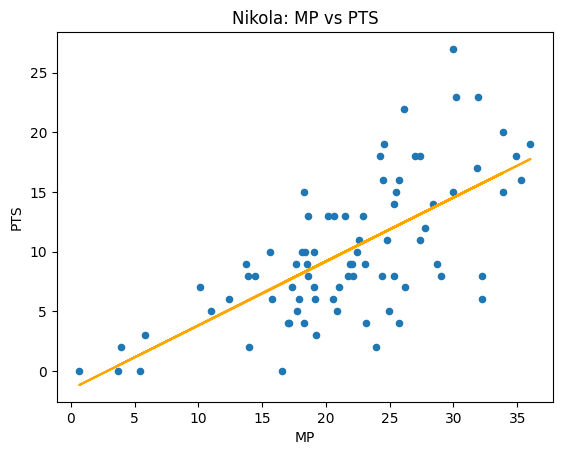

In [93]:
ax = nikola_15_dummy_lin_reg.plot(x = 'MP', y = 'PTS', kind = 'scatter')

ax.plot(X_train_mp, y_pred_1, color = "orange")
plt.title('Nikola: MP vs PTS')

plt.show()

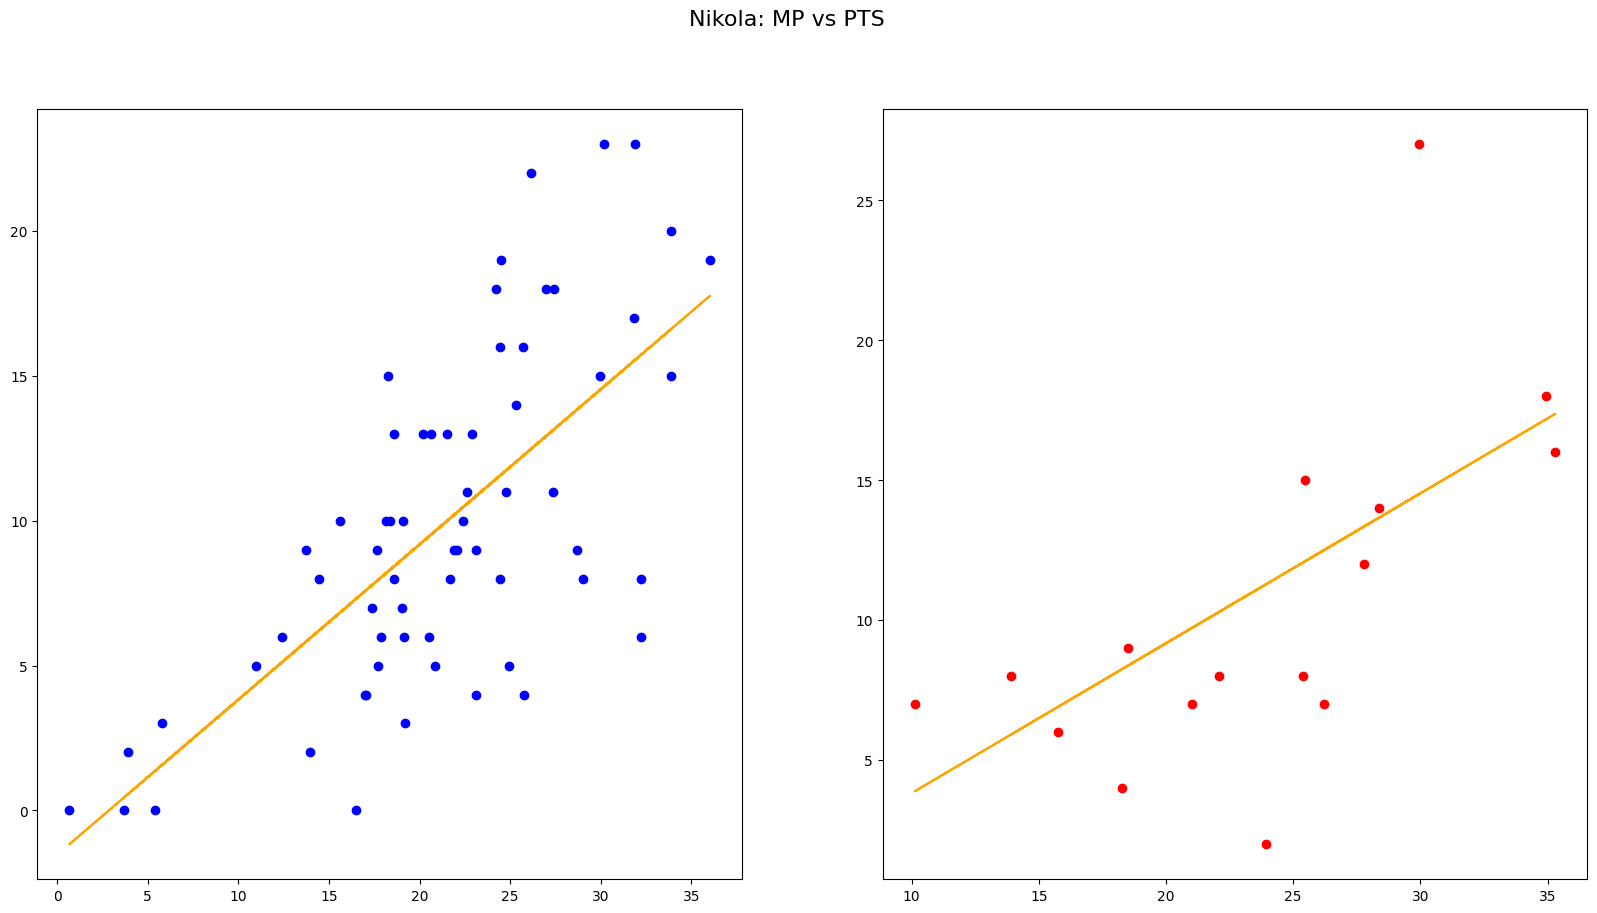

In [116]:
# Plot (MP vs PTS)

fig, axs = plt.subplots(1,2)

axs[0].scatter(x = X_train_mp, y = y_train_mp, color = "blue", label = "Pred 1")

axs[0].plot(X_train_mp, y_pred_1, color = "orange")

axs[1].scatter(x = X_test_mp, y = y_test_mp, color = "red", label = "Pred 2")
axs[1].plot(X_test_mp, y_pred, color = "orange")

fig.set_figheight(10)
fig.set_figwidth(20)

fig.suptitle('Nikola: MP vs PTS', fontsize=16)

plt.tight_layout

plt.show()

In [77]:
y_predicted = model_mp_pts.params.const + model_mp_pts.params.MP * X_test_mp

mse = mean_squared_error(y_test_mp, y_predicted)

rmse = root_mean_squared_error(y_test_mp, y_predicted)

print("mse: ", mse, "\n", "rmse: ", rmse)


print(model_mp_pts.rsquared)

mse:  21.745129204144206 
 rmse:  4.663167293175767
0.4723407205083493


In [71]:
r2_elissa = r2_score(y_test_mp, y_predicted)
r2_elissa


0.40627633572302513

In [133]:
# get input features and output feature, split data into training and testing
output = nikola_15_dummy_lin_reg[['PTS']].copy()
features = nikola_15_dummy_lin_reg.drop(labels = ['GmSc', 'PTS'], axis=1)


X_train, X_test, y_train, y_test = train_test_split(features, output, test_size=0.2, random_state = 50)

len(X_train), len(X_test), len(y_train), len(y_test)

(64, 16, 64, 16)

In [134]:
X_train_constant = sm.add_constant(X_train)

model_multiple_all = sm.OLS(y_train, X_train_constant).fit()

print(model_multiple_all.summary())

                            OLS Regression Results                            
Dep. Variable:                    PTS   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.741e+28
Date:                Fri, 28 Jun 2024   Prob (F-statistic):          3.11e-254
Time:                        17:25:58   Log-Likelihood:                 1930.8
No. Observations:                  64   AIC:                            -3770.
Df Residuals:                      18   BIC:                            -3670.
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.421e-14   2.09e-13     -0.068      0.9

In [122]:
full_lin_reg = LinearRegression()

full_lin_reg.fit(X_train, y_train)

LinearRegression()

In [124]:
y_pred_full = full_lin_reg.predict(X_test)

In [125]:
mse = mean_squared_error(y_test, y_pred_full)
r2 = r2_score(y_test, y_pred_full)

In [127]:
print(f"MSE: {mse}\nR2: {r2}")

MSE: 4.610398952951051e-28
R2: 1.0


In [128]:
# Print the coefficients
print("Coefficients:", full_lin_reg.coef_)

# Print the intercept
print("Intercept:", full_lin_reg.intercept_)

Coefficients: [[ 1.22422964e-16  1.72084569e-15  2.00000000e+00  9.39404220e-16
   1.00000000e+00 -3.47806226e-15  1.00000000e+00 -3.94240150e-16
   1.08657654e-15  1.64225062e-15 -3.66831582e-16  9.74788280e-16
   2.16286608e-17  4.91391287e-16 -1.03310714e-15 -5.42806544e-16
  -1.69972652e-15 -5.12808513e-16  4.57297362e-16 -8.69236023e-15
   1.62738404e-15  1.70956657e-15 -3.34100936e-15  5.77209753e-16
  -1.08565361e-15 -2.72184401e-15 -2.42870645e-15 -2.96314364e-15
   1.88198397e-16  1.29201387e-14 -3.17913959e-15  2.59342383e-15
  -4.06724893e-15  1.79692274e-15 -2.19934447e-15  2.87706856e-15
   7.01135861e-15 -3.49092078e-15  2.81633778e-15 -6.53133232e-16
  -6.01454610e-15  4.36897048e-15  1.26243876e-15  1.11975637e-15
  -1.14763949e-15  0.00000000e+00 -2.75557227e-16  2.50359026e-15
  -1.80127558e-15  1.80064297e-15]]
Intercept: [-4.79616347e-14]


In [165]:
# drop all the opp dummy columns

columns_to_drop = list(nikola_15_dummy_lin_reg.columns[0:1]) + ['FG', '3P', 'FT'] + list(nikola_15_dummy_lin_reg.columns[15:52])

features_1 = nikola_15_dummy_lin_reg.drop(labels = columns_to_drop, axis=1)

print(features_1.columns)

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(features_1, output, test_size=0.2, random_state = 50)

Index(['MP', 'FGA', '3PA', 'FTA', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK',
       'TOV'],
      dtype='object')


In [166]:
X_train_constant_1 = sm.add_constant(X_train_1)

model_multiple_1 = sm.OLS(y_train_1, X_train_constant_1).fit()

print(model_multiple_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    PTS   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     28.75
Date:                Fri, 28 Jun 2024   Prob (F-statistic):           6.01e-18
Time:                        17:48:38   Log-Likelihood:                -144.36
No. Observations:                  64   AIC:                             310.7
Df Residuals:                      53   BIC:                             334.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2842      1.070     -1.201      0.2